## Advanced Linear Regression - Housing Assignment


## Step 1: Reading and Understanding the Data

In [199]:
# Importing Libraries
import numpy as np
import pandas as pd

# Importing Libraries for data split and standarizing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Library for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Stat model and VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [200]:
# Read dataset
housing = pd.read_csv(r'C:\Users\I552991\Downloads\train.csv')
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
# Check the shape of the dataset
housing.shape

(1460, 81)

In [202]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [203]:
# Alley, PoolQC, Fense and MiscFeature as these are mostly  null 
housing.drop(['Alley'], axis = 1, inplace = True)
housing.drop(['PoolQC'], axis = 1, inplace = True)
housing.drop(['MiscFeature'], axis = 1, inplace = True)
housing.drop(['Fence'], axis = 1, inplace = True)

#Remove Id
housing.drop(['Id'], axis = 1, inplace = True)

In [204]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [205]:
# Fill none values with 'None' for the rest of the columns
housing['MasVnrType'].fillna('None',inplace=True)
housing['MasVnrArea'].fillna(0,inplace=True)
housing['BsmtQual'].fillna('None',inplace=True)
housing['BsmtCond'].fillna('None',inplace=True)
housing['BsmtExposure'].fillna('None',inplace=True)
housing['BsmtFinType1'].fillna('None',inplace=True)
housing['BsmtFinType2'].fillna('None',inplace=True)
housing['Electrical'].fillna('None',inplace=True)
housing['GarageType'].fillna('None',inplace=True)
housing['GarageFinish'].fillna('None',inplace=True)
housing['GarageYrBlt'].fillna(0,inplace=True)
housing['GarageQual'].fillna('None',inplace=True)
housing['GarageCond'].fillna('None',inplace=True)
housing['FireplaceQu'].fillna('None',inplace=True)
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)

In [206]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [208]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Visualising the Data

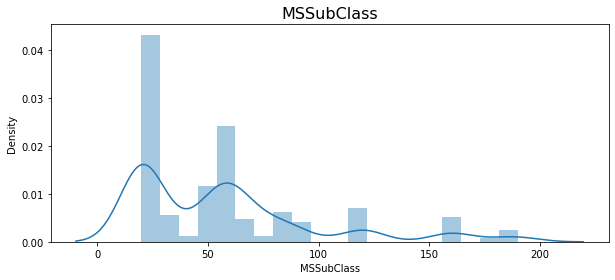

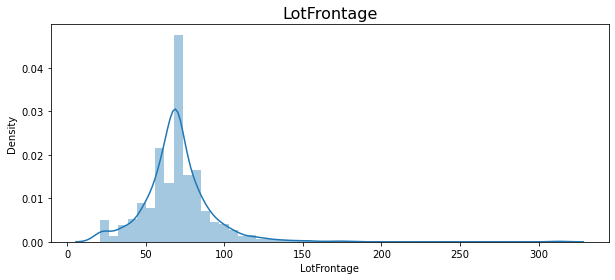

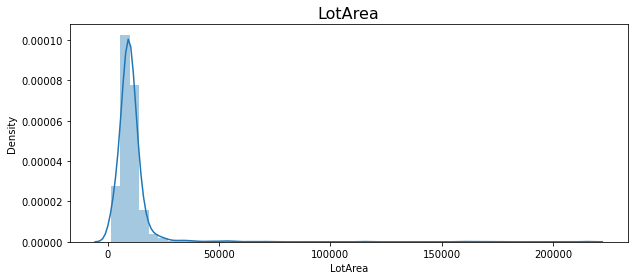

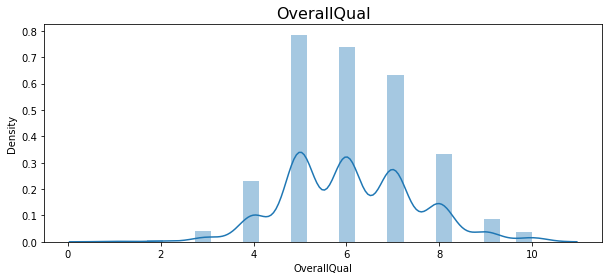

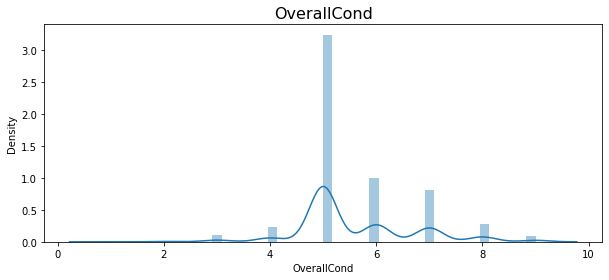

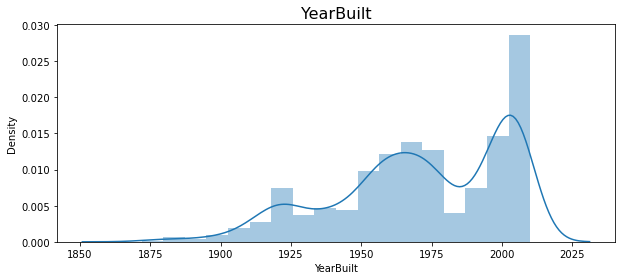

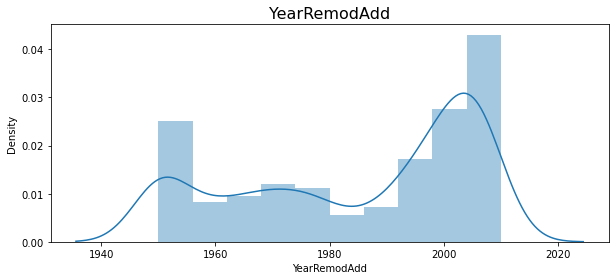

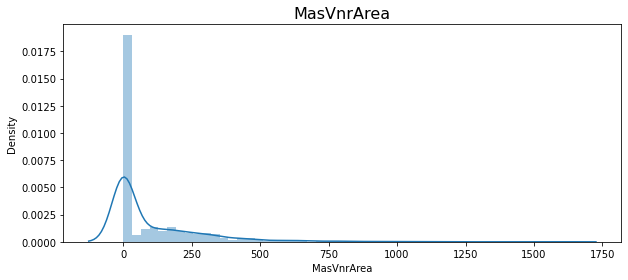

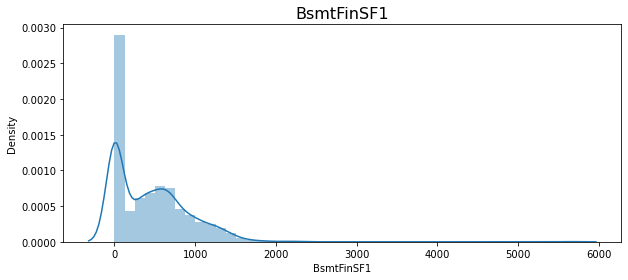

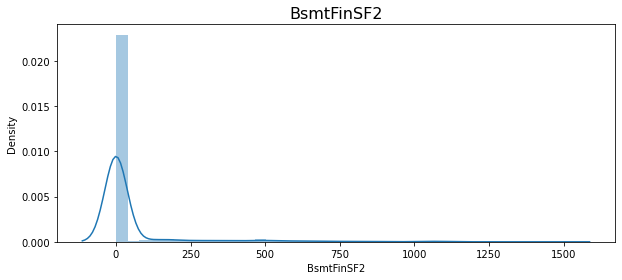

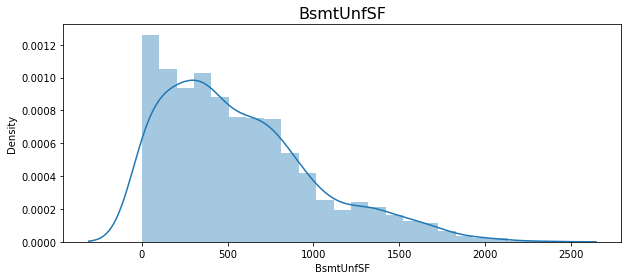

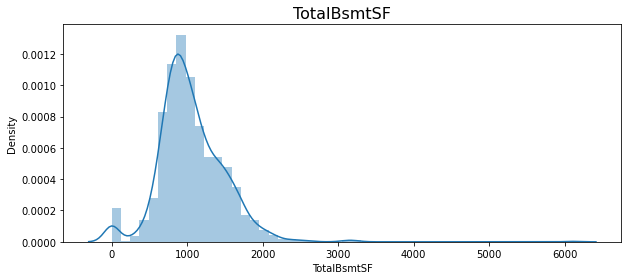

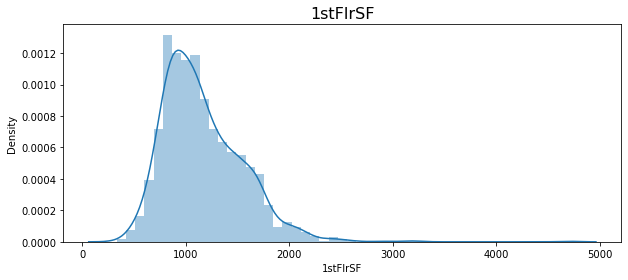

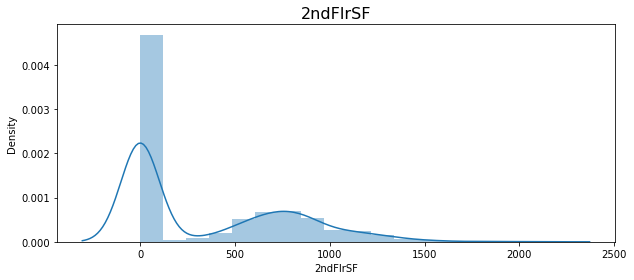

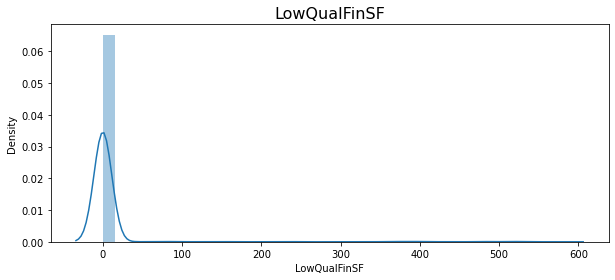

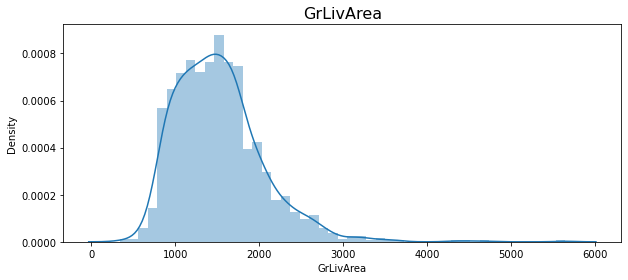

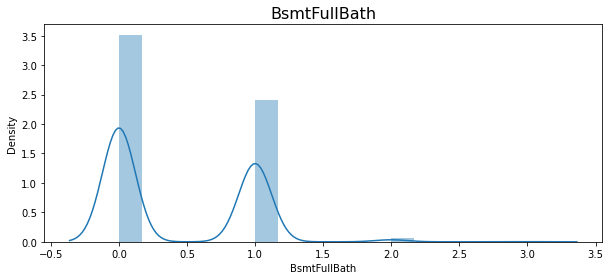

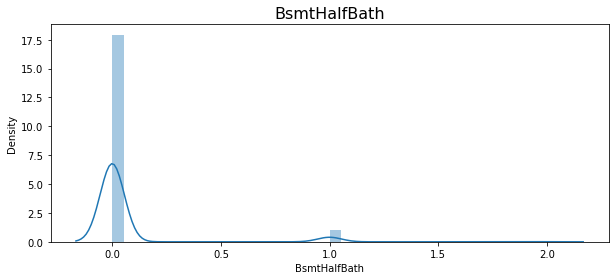

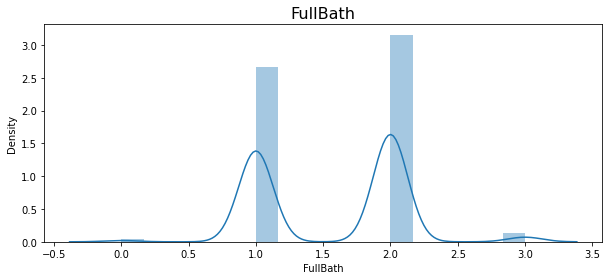

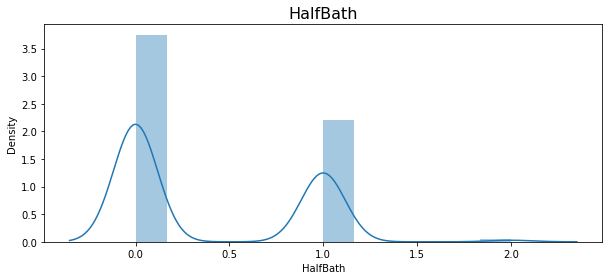

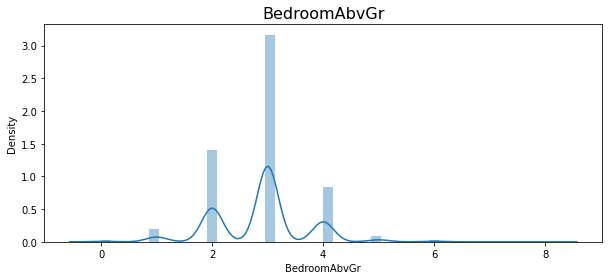

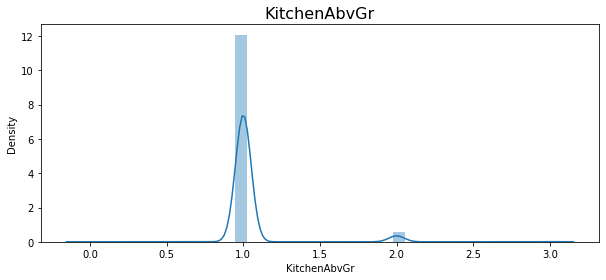

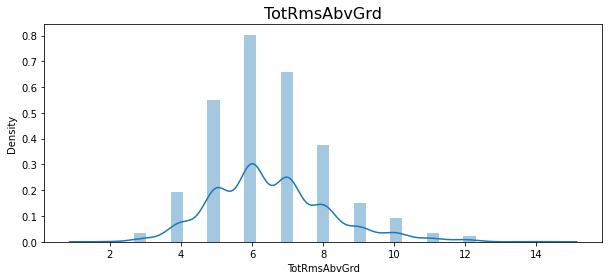

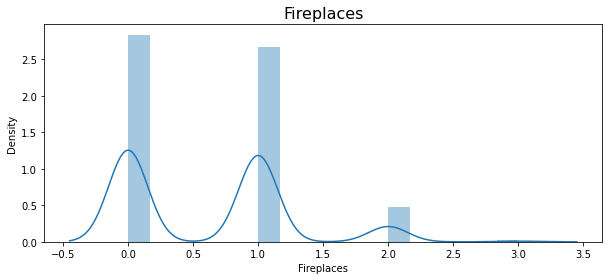

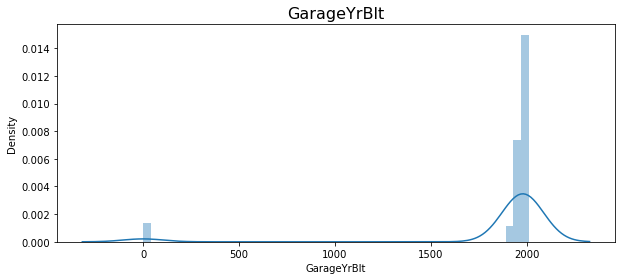

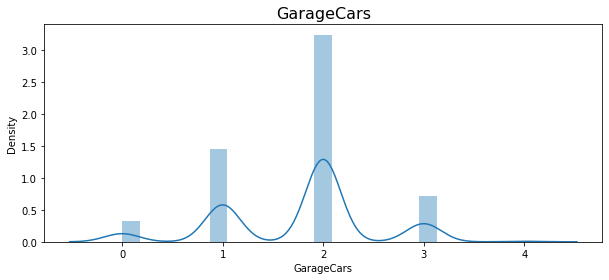

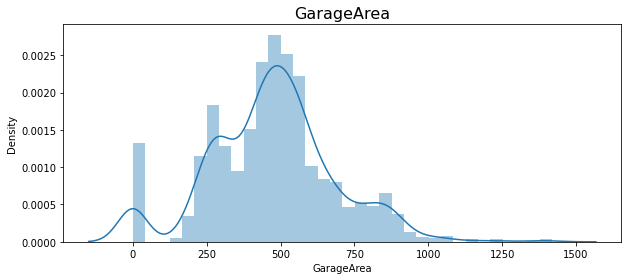

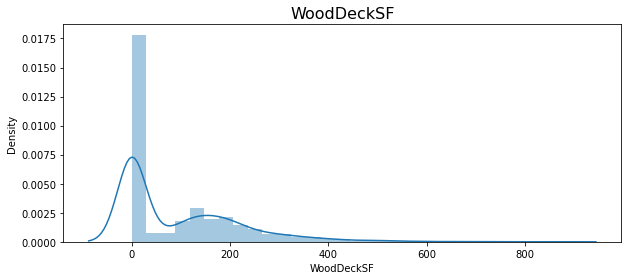

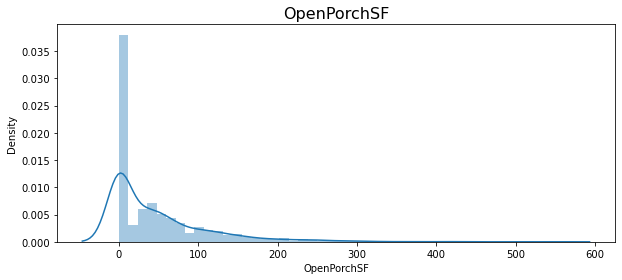

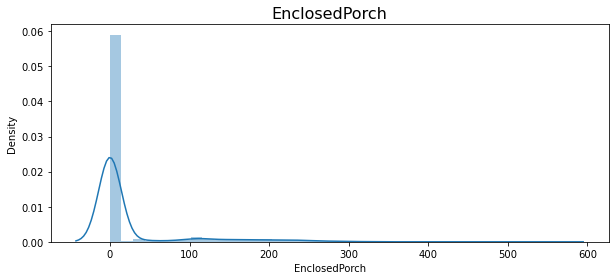

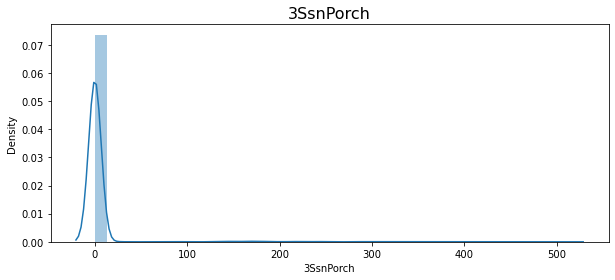

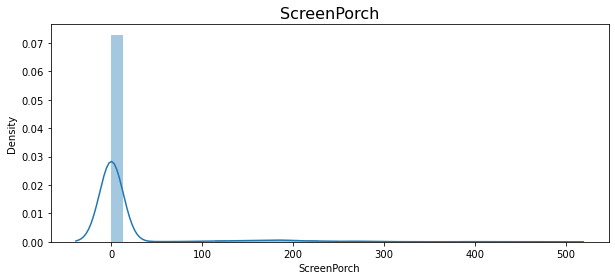

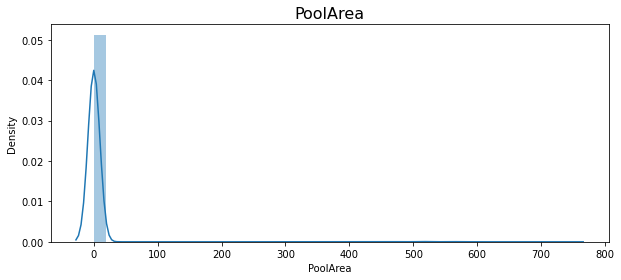

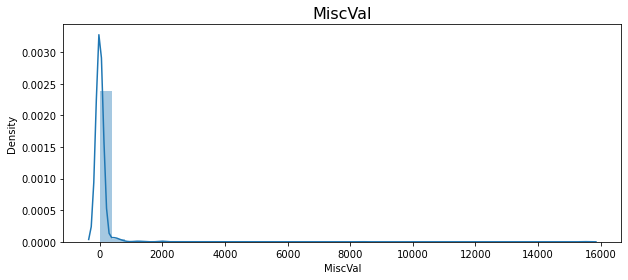

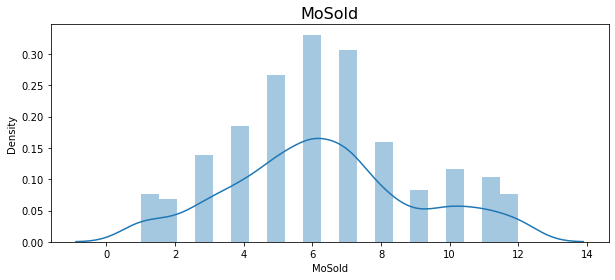

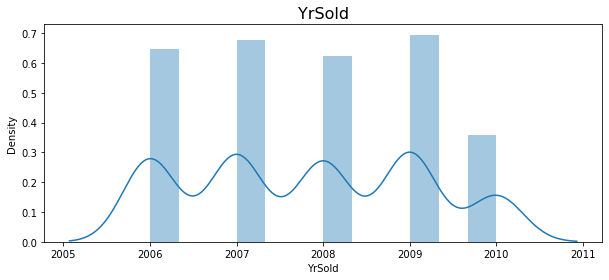

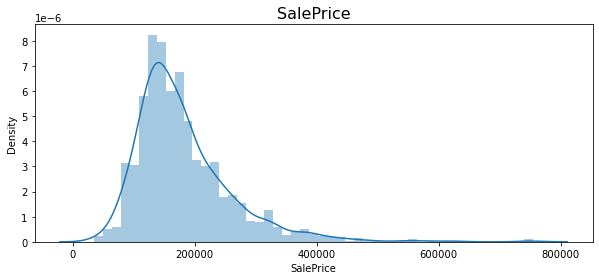

In [209]:
num_col = housing.select_dtypes(include=['number']).columns

for col in num_col:
    plt.figure(figsize=(10,4))
    plt.title(col, fontdict={'fontsize': 16})
    sns.distplot(housing[col])
    plt.show() 

In [210]:
#Adding Year Old and Year Remod Old columns
housing['YearOld'] = 2023 - housing['YearBuilt']
housing['YearRemodOld'] = 2023 - housing['YearRemodAdd']
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearOld,YearRemodOld
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,20,20
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,47,47
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,22,21
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,108,53
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,23,23


In [211]:
# Remove the Year columns
housing.drop(['YearBuilt'], axis = 1, inplace = True)
housing.drop(['YearRemodAdd'], axis = 1, inplace = True)

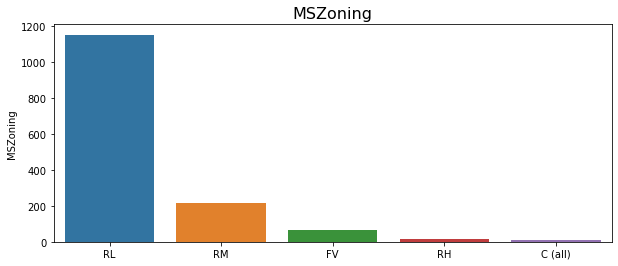

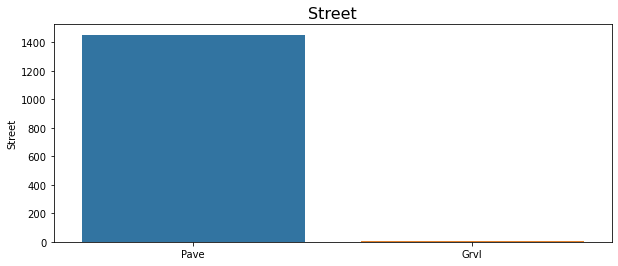

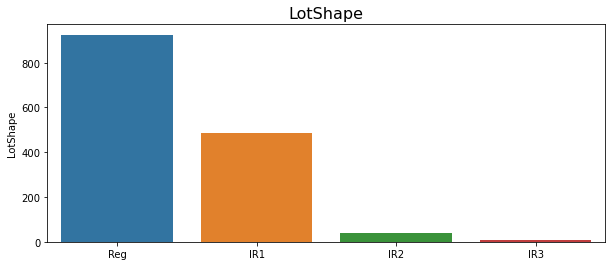

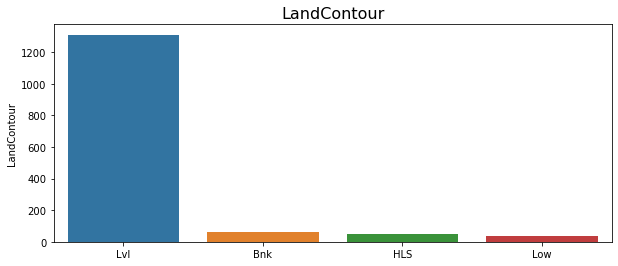

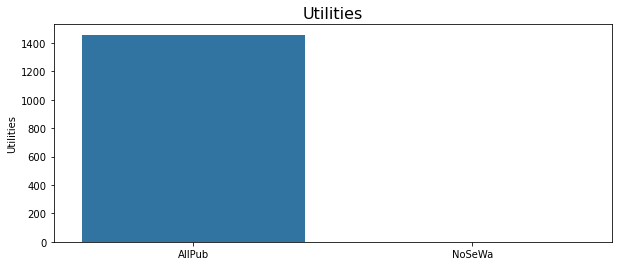

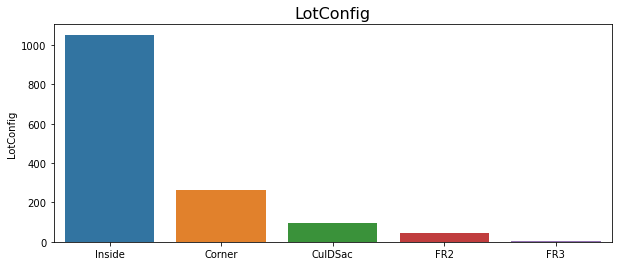

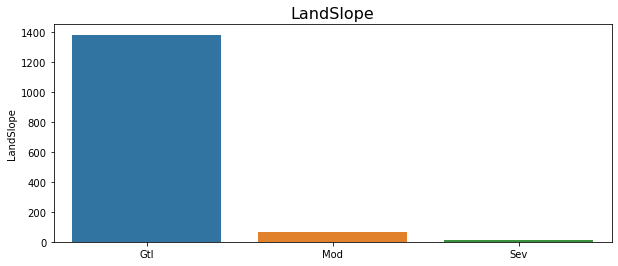

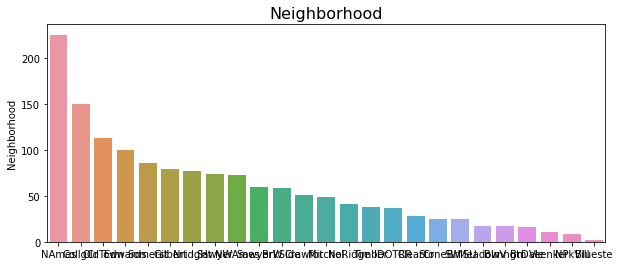

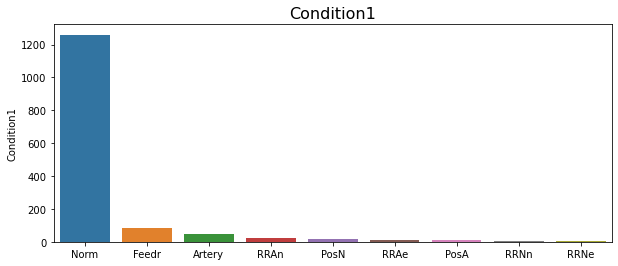

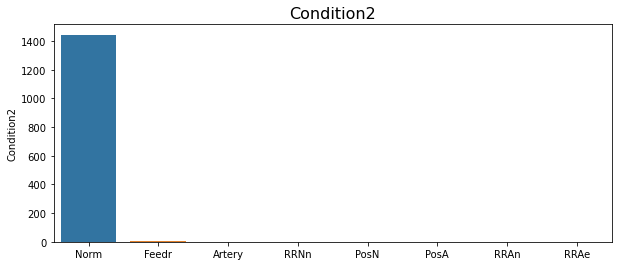

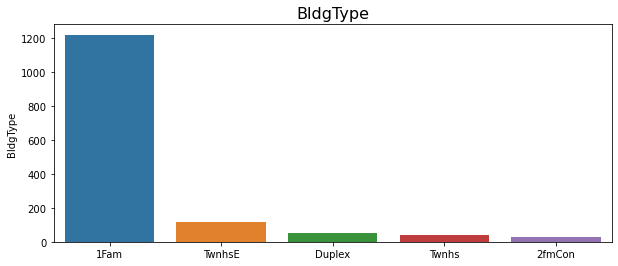

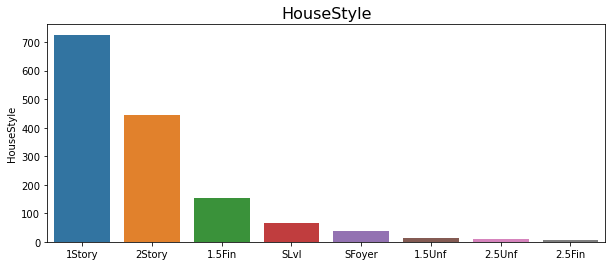

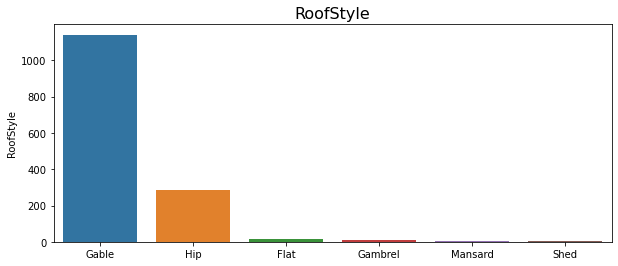

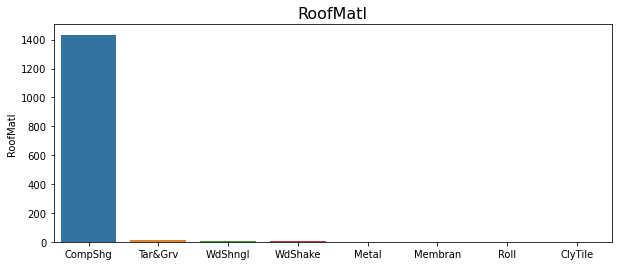

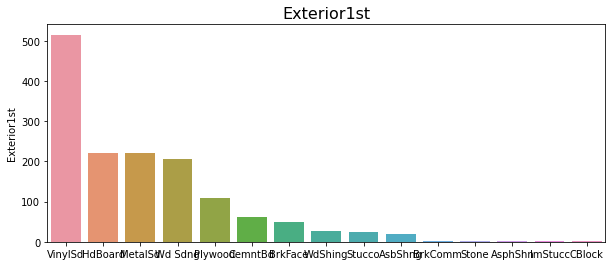

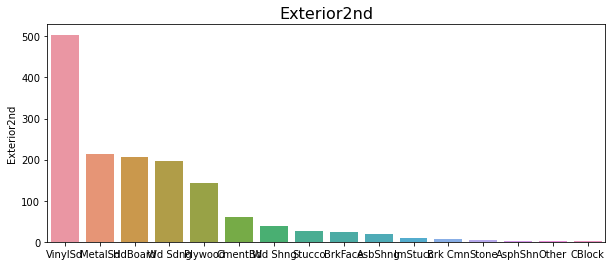

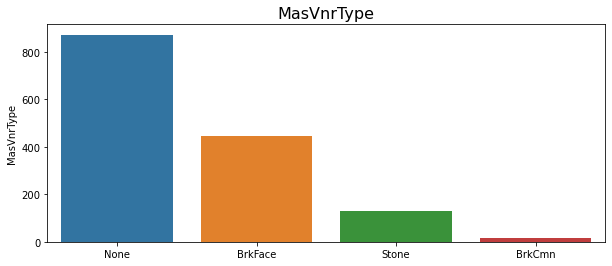

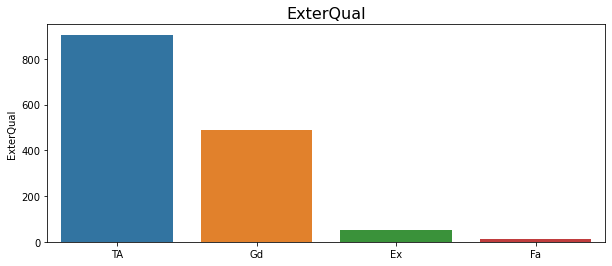

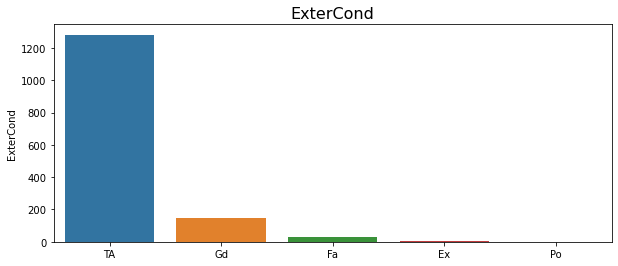

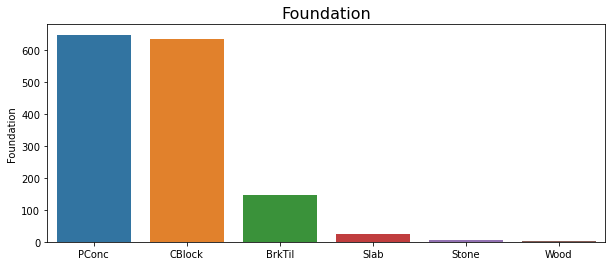

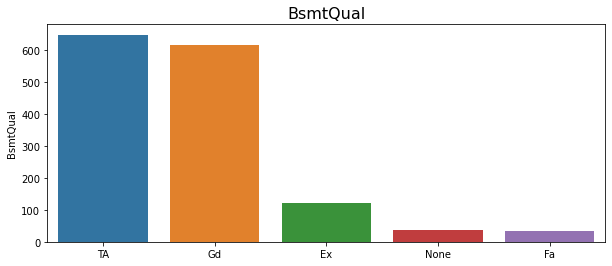

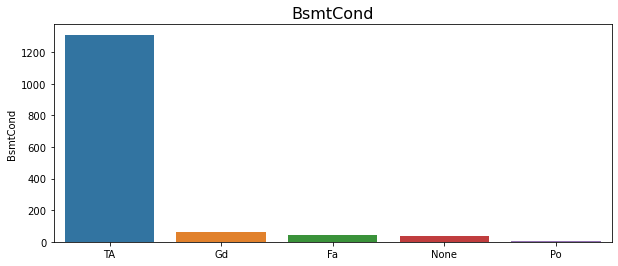

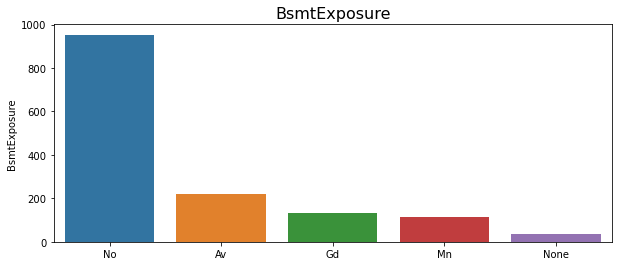

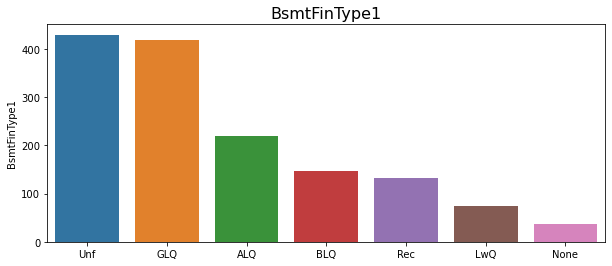

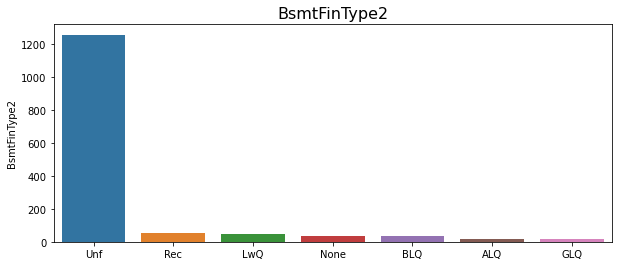

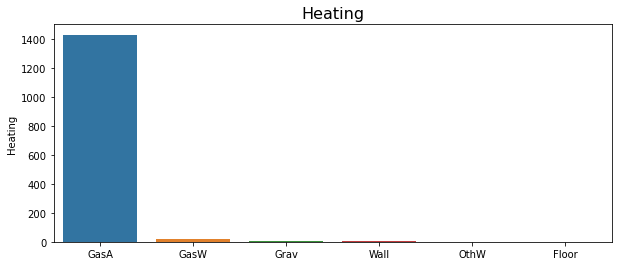

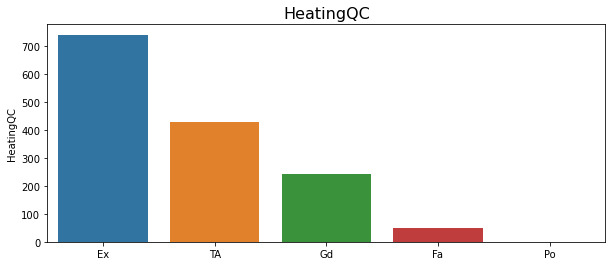

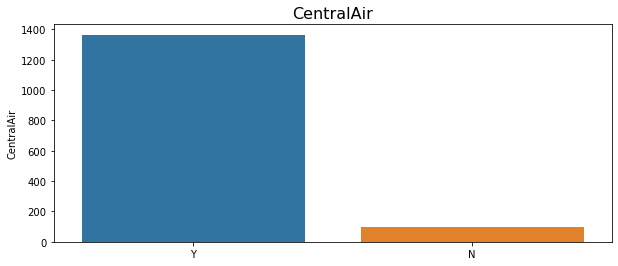

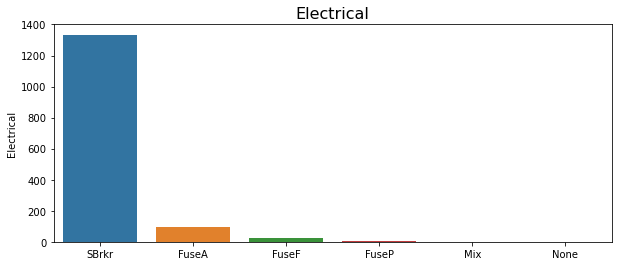

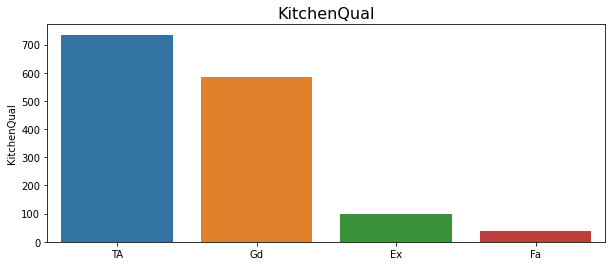

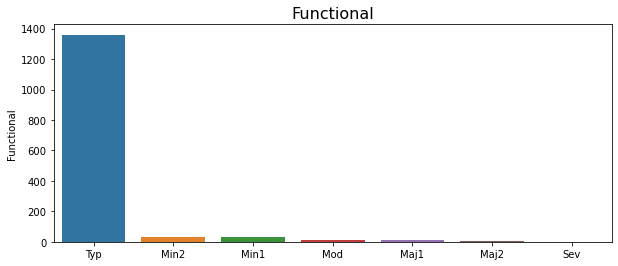

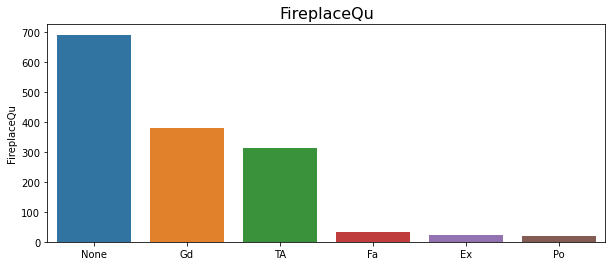

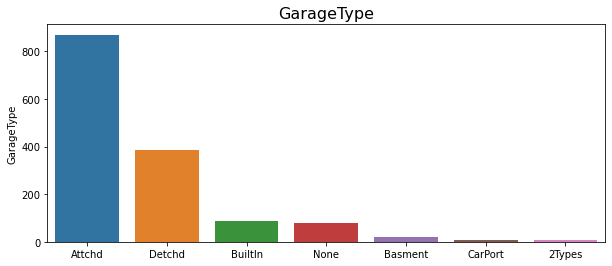

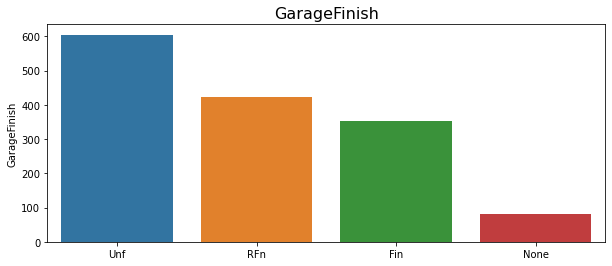

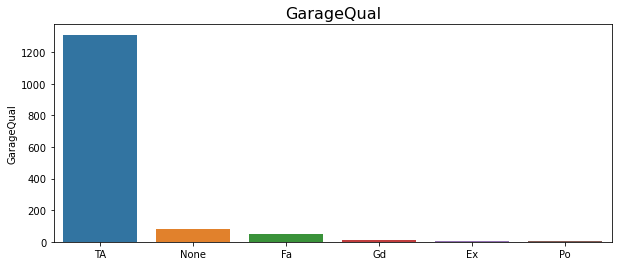

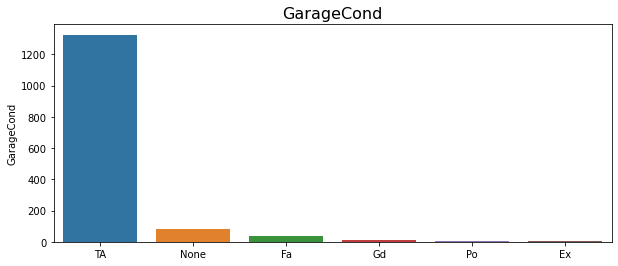

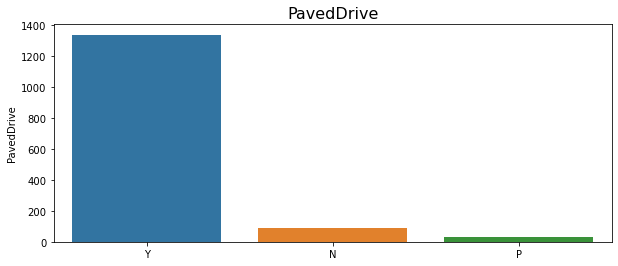

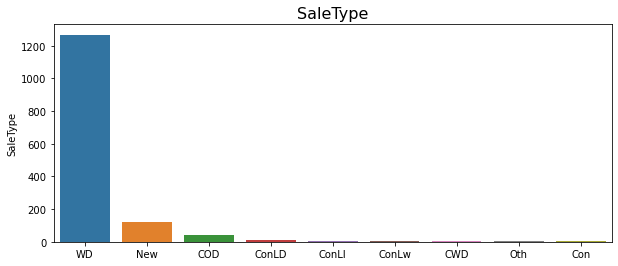

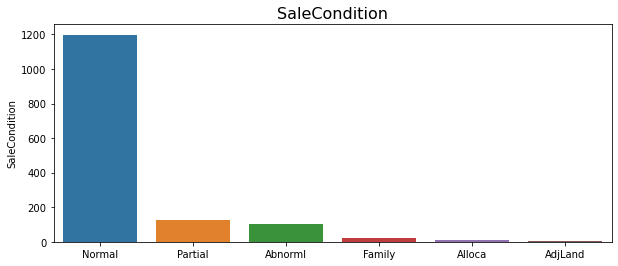

In [212]:
cat_col = housing.select_dtypes(include=['object']).columns
for col in cat_col:
    plt.figure(figsize=(10,4))
    plt.title(col, fontdict={'fontsize': 16})
    sns.barplot(housing[col].value_counts().index, housing[col].value_counts())
    plt.show()

In [213]:
for col in cat_col:
    housing[col] = housing[col].mask(housing[col].map(housing[col].value_counts(normalize=True)) < 0.01, 'Other')


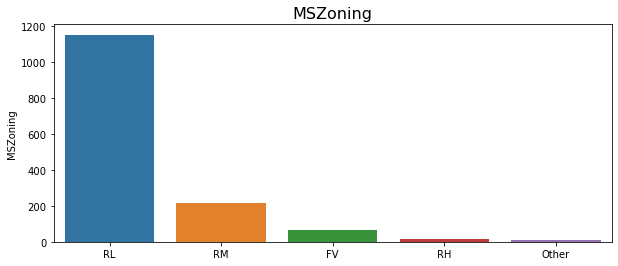

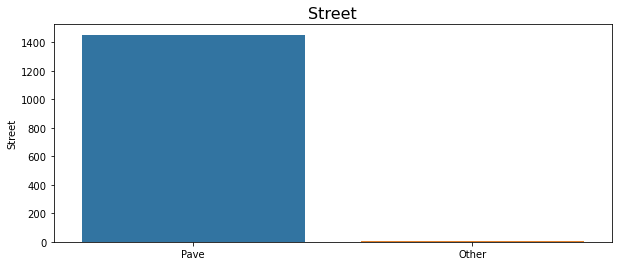

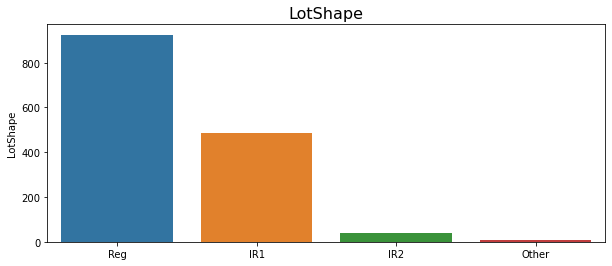

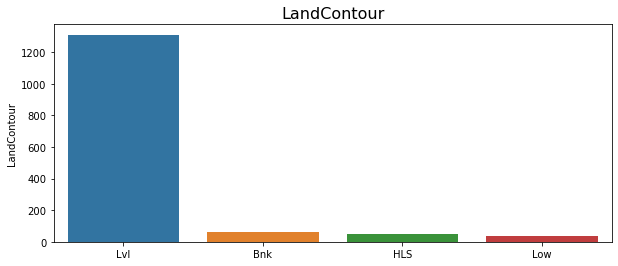

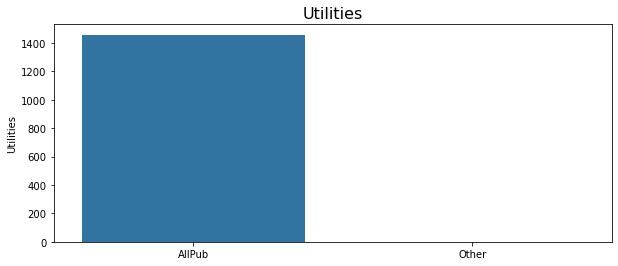

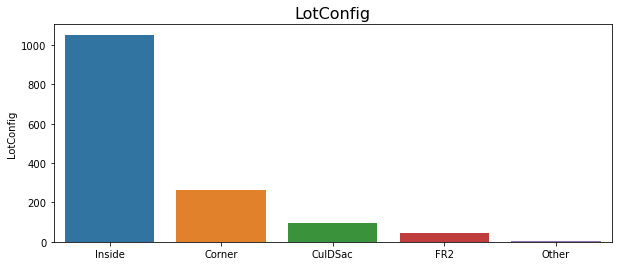

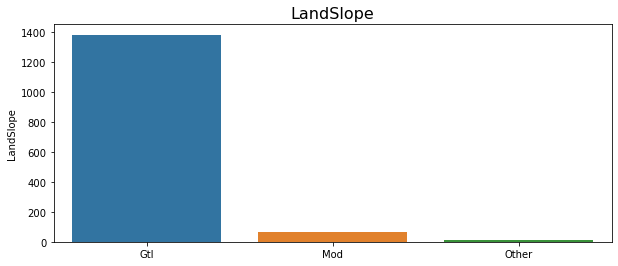

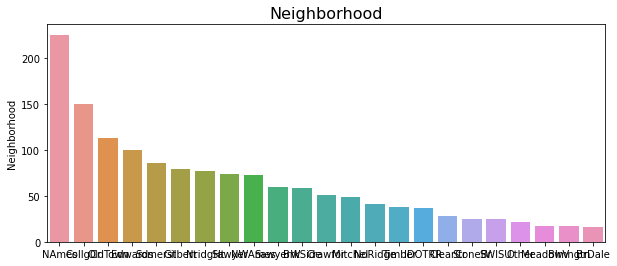

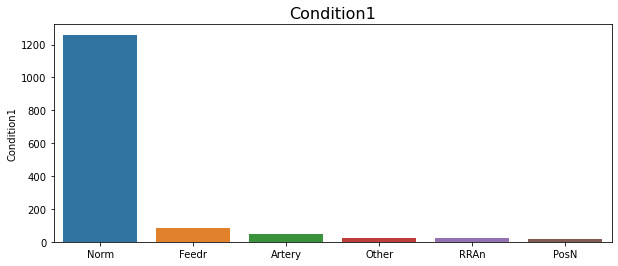

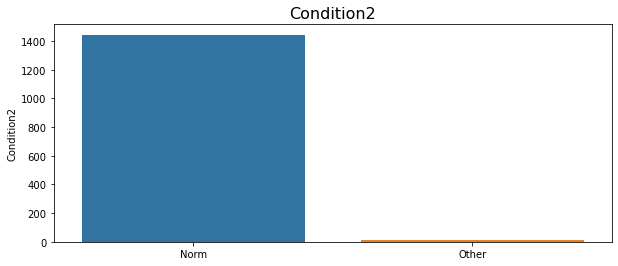

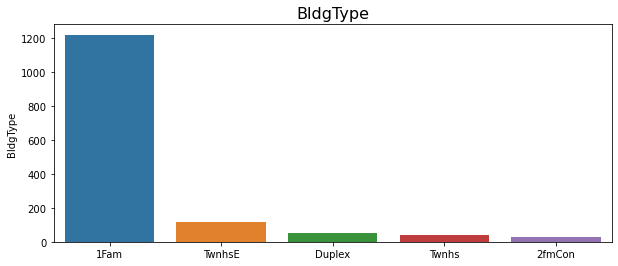

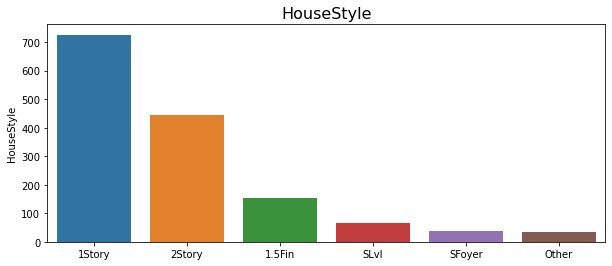

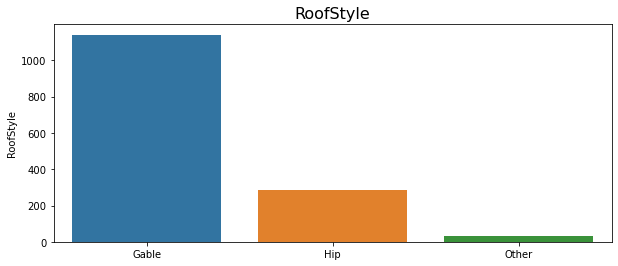

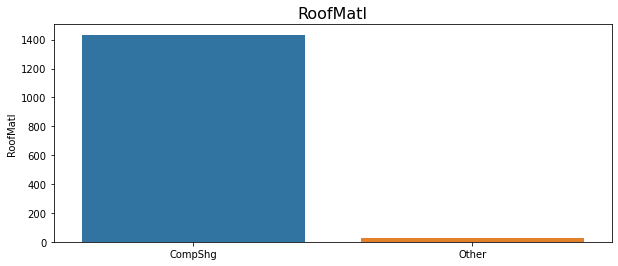

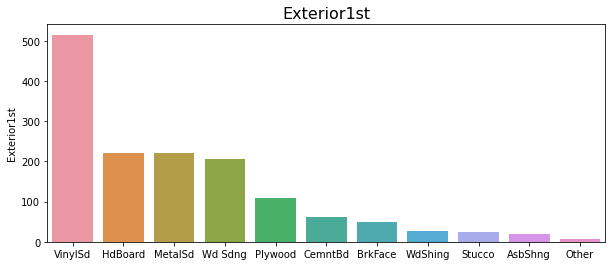

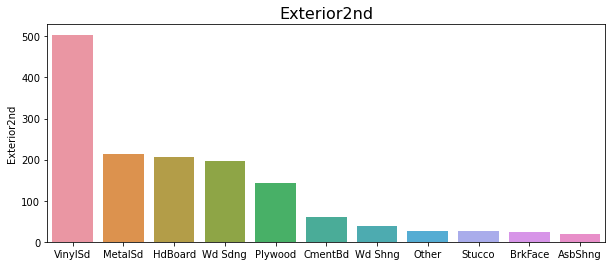

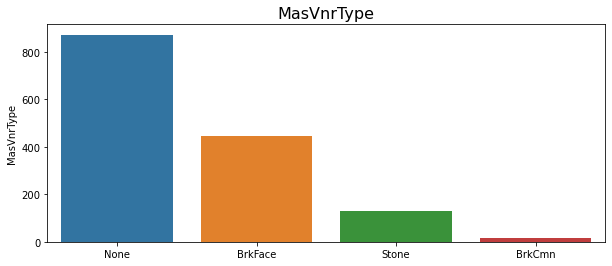

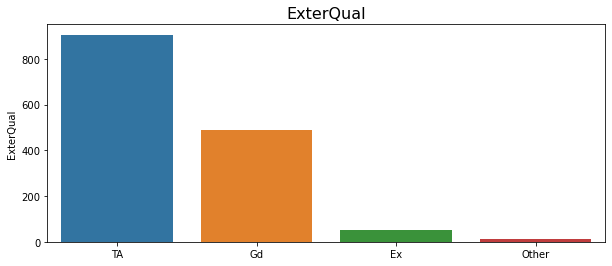

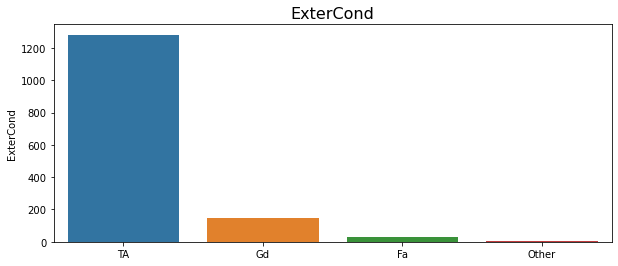

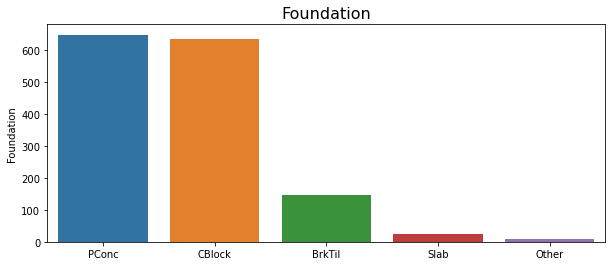

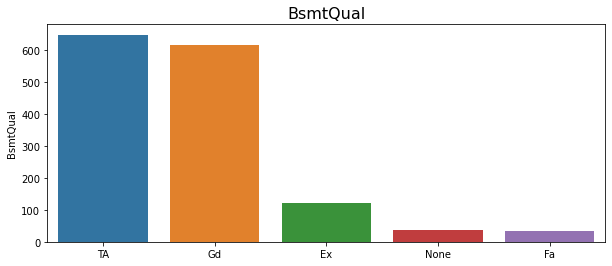

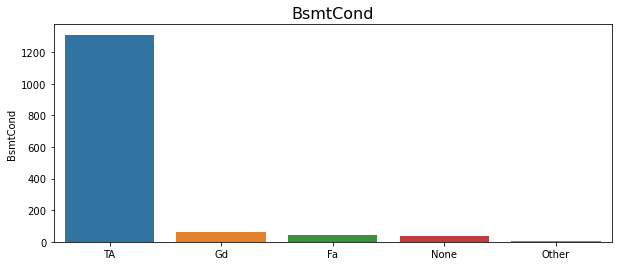

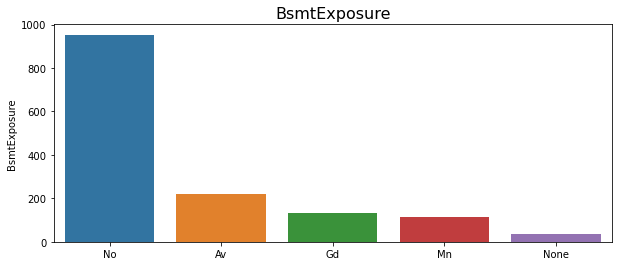

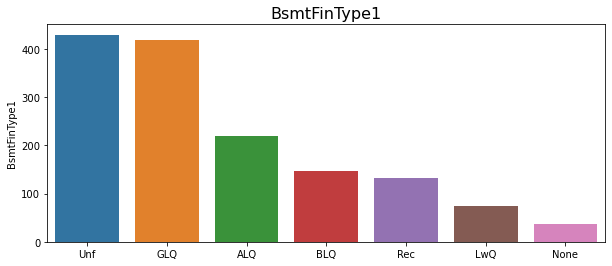

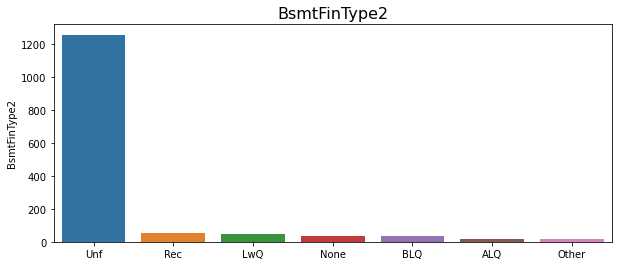

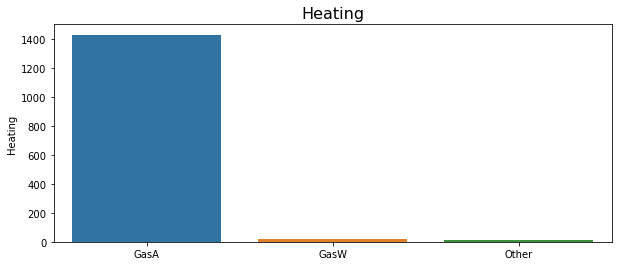

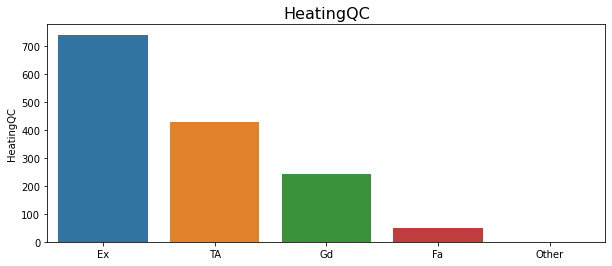

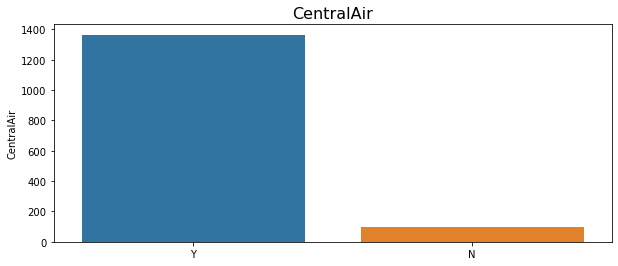

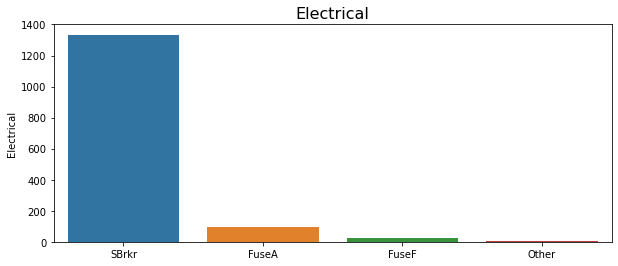

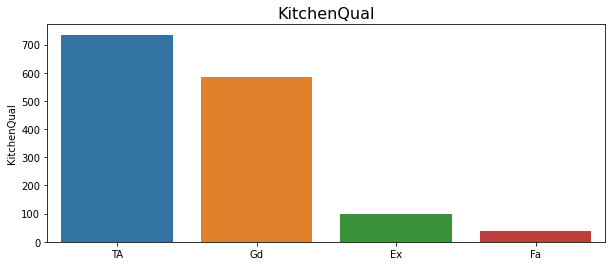

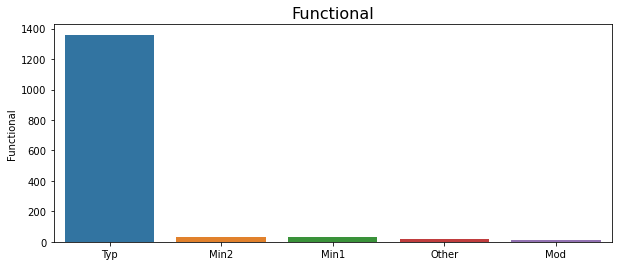

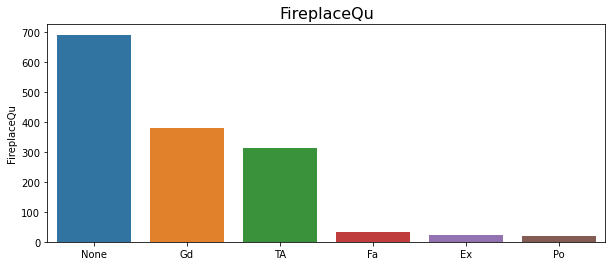

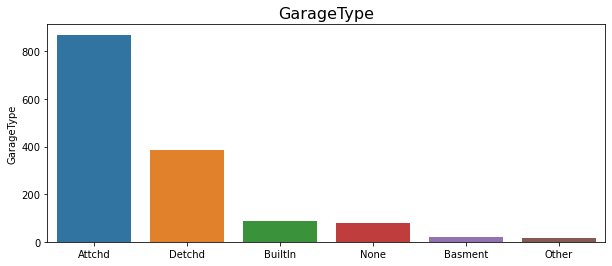

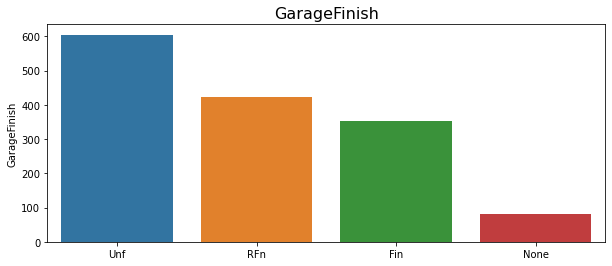

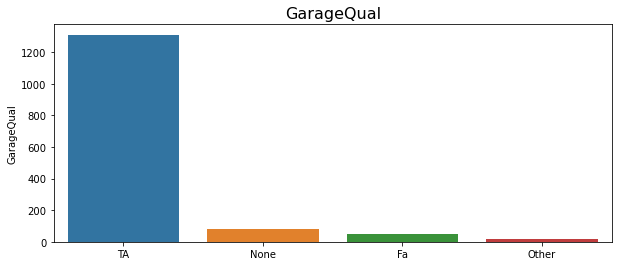

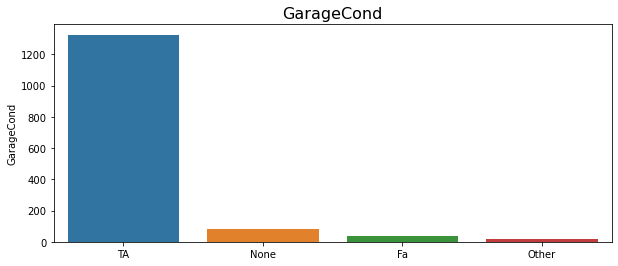

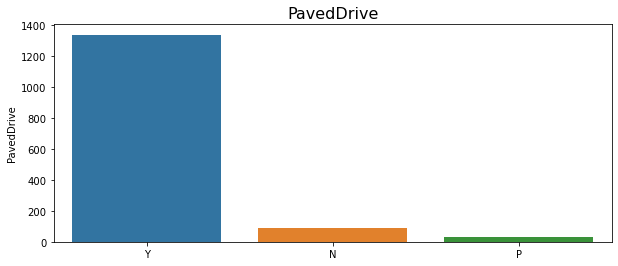

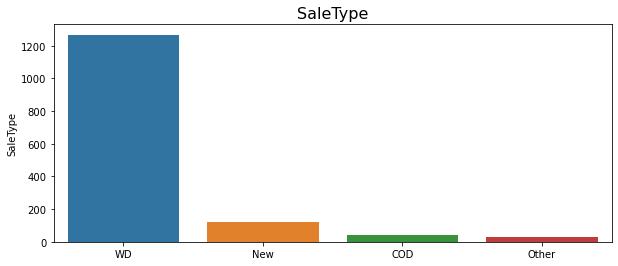

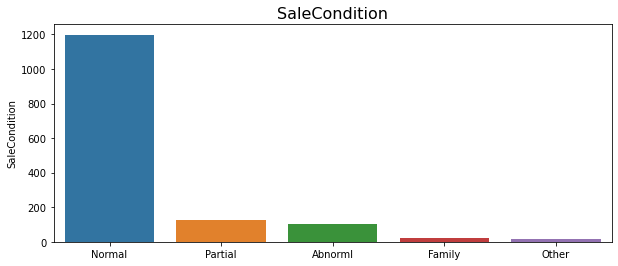

In [214]:
cat_col = housing.select_dtypes(include=['object']).columns
for col in cat_col:
    plt.figure(figsize=(10,4))
    plt.title(col, fontdict={'fontsize': 16})
    sns.barplot(housing[col].value_counts().index, housing[col].value_counts())
    plt.show()

# Step 3: Creating dummy variables for categorical variables

In [215]:
for col in cat_col:
    dummy = pd.get_dummies(housing[col], drop_first = True, prefix=col)
    housing = pd.concat([housing, dummy], axis = 1)
    housing.drop([col], axis = 1, inplace = True)
print(housing.head(5))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageCond_TA  \
0         706           0        150          856  ...              1   
1         978           0        284         1262  ...              1   
2         486           0        434          920  ...              1   
3         216           0        540          756  ...              1   
4         655           0        490         1145  ...              1   

   PavedDrive_P  PavedDrive_Y  SaleType_New  SaleType_Other  SaleType_WD  \
0             0       

## Step 4: Splitting the Data into Training and Testing Sets

In [216]:
# Splitting data set to 70% train data and 30% test data
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
# Mapping Count(Target/dependent) variable to Y axis and rest of the independent variables to X axis
y_train = df_train.pop('SalePrice')
X_train = df_train

In [218]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### Scaling

In [219]:
num_col = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-5.118878e-17,9.215612e-17,1.034590e-16,1.176554e-16,1.647936e-16,-9.210175e-17,-4.066831e-17,2.154115e-16,1.229292e-16,4.697516e-17,...,0.905975,0.020568,0.915769,0.078355,0.020568,0.870715,0.013712,0.825661,0.010774,0.078355
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.292007,0.142003,0.277870,0.268860,0.142003,0.335680,0.116350,0.379587,0.103287,0.268860
min,-8.880864e-01,-2.199702e+00,-8.742840e-01,-3.638884e+00,-4.197642e+00,-5.580245e-01,-9.635738e-01,-2.933126e-01,-1.257417e+00,-2.313626e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.880864e-01,-4.324932e-01,-2.950018e-01,-7.798608e-01,-5.330054e-01,-5.580245e-01,-9.635738e-01,-2.933126e-01,-7.757532e-01,-5.856252e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.950396e-01,-2.467586e-02,-9.566430e-02,-6.510508e-02,-5.330054e-01,-5.580245e-01,-1.200318e-01,-2.933126e-01,-2.271922e-01,-1.519906e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2.669916e-01,3.831415e-01,9.959718e-02,6.496507e-01,3.831537e-01,2.857702e-01,5.685740e-01,-2.933126e-01,5.399012e-01,5.496695e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,3.039179e+00,1.103171e+01,1.987157e+01,2.793918e+00,3.131631e+00,7.986733e+00,1.118171e+01,8.338494e+00,3.951683e+00,1.100048e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5: Model Building

## Model 1: Ridge

In [220]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.7, 1.0, 3.0, 5.0, 10.0, 15.0, 25.0, 50, 100, 500]}

In [221]:
ridge = Ridge()
# cross validation
ridgeCV = GridSearchCV(estimator = ridge,
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error',  
                       cv = 5, 
                       return_train_score=True,
                       verbose = 1, n_jobs=-1)
ridgeCV.fit(X_train, y_train) 

print(ridgeCV.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
{'alpha': 50}


In [222]:
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.74799383e+03 -2.03129483e+03  3.62455855e+03  1.72120050e+04
  5.32778978e+03  5.29683017e+03  9.81924909e+02  9.93850937e+02
  1.54798709e+03  2.87682767e+03  6.32772309e+03  1.09808925e+04
 -1.01794532e+03  1.36262407e+04  5.24984864e+03  6.57670562e+02
  3.95838726e+03  1.47028121e+03 -2.09075658e+03 -3.42910618e+03
  3.08163668e+03  3.49382522e+03 -2.77747741e+03  9.10839616e+03
  1.62166739e+03  2.28552232e+03 -7.21933775e+02  5.45540420e+02
  1.39430494e+03  1.42466463e+03 -9.22228321e+02 -2.13360289e+02
 -6.12875114e+02 -1.29996088e+03 -5.54144400e+03 -2.53210755e+03
 -2.48713331e+03  5.09612280e+02  2.65636598e+03 -3.80014358e+03
  1.70873924e+03  9.60236934e+02 -4.78178458e+03 -1.20554870e+02
  3.61912169e+03  2.59943244e+03  6.01217074e+03 -8.53212073e+02
  5.08427591e+03 -3.26665319e+03 -9.38499390e+02 -6.14676230e+02
  3.82089375e+03 -2.25954078e+02 -5.53123420e+02  1.40083620e+03
  1.62743238e+03 -4.75896088e+03  8.11809821e+03 -1.06915767e+04
 -5.08269331e+03 -1.10955

In [223]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [224]:
# Train Metrics
metrics=[]
r2 = r2_score(y_train, y_train_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_train - y_train_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_train, y_train_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)

R2 Score is: 0.8683487190782597
RSS is  840027170126.966
MSE is:  822749432.0538354
RMSE is:  28683.609118342054


In [225]:
# Test Metrics
r2 = r2_score(y_test, y_test_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_test - y_test_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_test, y_test_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)

R2 Score is: 0.8647536737973723
RSS is  381220514351.19336
MSE is:  870366471.121446
RMSE is:  29501.974020757425


In [226]:
# let us do a log transformation of saleprice for better model understanding
y_train = np.log(y_train)
y_test = np.log(y_test)

In [227]:
# run cross validation again
ridge = Ridge()
# cross validation
ridgeCV = GridSearchCV(estimator = ridge,
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error',  
                       cv = 5, 
                       return_train_score=True,
                       verbose = 1, n_jobs=-1)
ridgeCV.fit(X_train, y_train) 

print(ridgeCV.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
{'alpha': 15.0}


In [229]:
# create new model
alpha = 15
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02392395 -0.00843982  0.01772211  0.08228445  0.04075566 -0.00141448
 -0.00092443  0.00768062  0.00497607  0.00678449  0.03674105  0.04118971
  0.00205842  0.06137463  0.03003599  0.00310624  0.0199195   0.01188586
  0.01055057 -0.01127831  0.01674368  0.00447676 -0.00340009  0.04215108
  0.00547279  0.01249381 -0.00192075  0.00955785  0.00770344  0.01104257
 -0.01556992 -0.00190504 -0.00176752 -0.00748196 -0.03611179 -0.02248542
 -0.09620658  0.01969365  0.03193104 -0.01992288  0.01941112  0.01848929
 -0.03875338  0.00164078  0.03055039  0.03576812  0.04081272 -0.00984218
  0.029343   -0.03099813 -0.00799016 -0.00430321  0.02451858 -0.00582494
 -0.01947768  0.01748247  0.04703159 -0.01621165  0.09033929 -0.07670158
 -0.02827626 -0.0510939  -0.0353871  -0.02207989 -0.00850572 -0.0113438
  0.0386454   0.0700582  -0.0212818   0.00837322  0.0086263  -0.02585059
 -0.01145671  0.07263921  0.04488124 -0.01591101 -0.00051584  0.05721464
 -0.00729905 -0.02812532  0.02508316 -0.02998484  0.

In [230]:
# predictions again
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [231]:
# Train Metrics
metrics=[]
r2 = r2_score(y_train, y_train_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_train - y_train_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_train, y_train_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)

R2 Score is: 0.9165236544058559
RSS is  13.397305883363313
MSE is:  0.013121749151188357
RMSE is:  0.11455020362787818


In [232]:
# Test Metrics
r2 = r2_score(y_test, y_test_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_test - y_test_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_test, y_test_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)

R2 Score is: 0.8890678233164041
RSS is  7.99472345586241
MSE is:  0.01825279327822468
RMSE is:  0.13510289885204047


In [233]:
## Display ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017408,0.000799,0.005834,0.000440,0.0001,{'alpha': 0.0001},-0.102131,-0.098280,-0.103827,-0.095076,...,-0.099911,0.003046,17,-0.074460,-0.063762,-0.070006,-0.076482,-0.075511,-0.072044,0.004697
1,0.022104,0.004581,0.007271,0.002709,0.001,{'alpha': 0.001},-0.102117,-0.098266,-0.103808,-0.095060,...,-0.099895,0.003046,16,-0.074459,-0.063761,-0.070003,-0.076480,-0.075511,-0.072043,0.004697
2,0.021945,0.001977,0.006030,0.000624,0.01,{'alpha': 0.01},-0.101984,-0.098130,-0.103632,-0.094904,...,-0.099742,0.003042,15,-0.074447,-0.063757,-0.069976,-0.076457,-0.075515,-0.072030,0.004696
3,0.018395,0.001364,0.008800,0.004247,0.05,{'alpha': 0.05},-0.101520,-0.097717,-0.103091,-0.094293,...,-0.099228,0.003063,14,-0.074422,-0.063758,-0.069903,-0.076382,-0.075541,-0.072001,0.004689
4,0.018587,0.000799,0.005596,0.000495,0.1,{'alpha': 0.1},-0.101080,-0.097464,-0.102700,-0.093623,...,-0.098788,0.003133,13,-0.074420,-0.063765,-0.069857,-0.076327,-0.075568,-0.071987,0.004684
5,0.018200,0.000746,0.005201,0.000397,0.2,{'alpha': 0.2},-0.100319,-0.097161,-0.102247,-0.092459,...,-0.098122,0.003315,11,-0.074418,-0.063787,-0.069787,-0.076283,-0.075608,-0.071977,0.004681
6,0.021520,0.008925,0.008714,0.003584,0.4,{'alpha': 0.4},-0.099273,-0.096736,-0.101726,-0.090762,...,-0.097190,0.003647,10,-0.074453,-0.063872,-0.069798,-0.076267,-0.075670,-0.072012,0.004661
7,0.018004,0.000631,0.009594,0.003130,0.7,{'alpha': 0.7},-0.098064,-0.096241,-0.101280,-0.088838,...,-0.096139,0.004086,9,-0.074509,-0.064004,-0.069924,-0.076295,-0.075747,-0.072096,0.004626
8,0.028889,0.018910,0.006000,0.001412,1.0,{'alpha': 1.0},-0.097076,-0.095928,-0.101049,-0.087302,...,-0.095331,0.004485,8,-0.074599,-0.064119,-0.070017,-0.076352,-0.075807,-0.072178,0.004606
9,0.019951,0.001318,0.007413,0.001621,3.0,{'alpha': 3.0},-0.094202,-0.094968,-0.100567,-0.082736,...,-0.092769,0.005836,7,-0.075209,-0.065112,-0.070667,-0.076980,-0.076270,-0.072848,0.004449


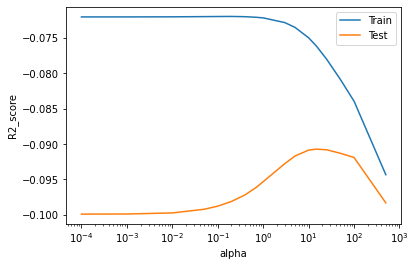

In [234]:
## Plotting R2 score against alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

## Model 2: Lasso

In [235]:
lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.7, 1.0, 3.0, 5.0, 10.0, 15.0, 25.0, 50,
                                   100, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [236]:
lassoCV.best_params_

{'alpha': 0.001}

In [237]:
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [238]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [239]:
# Train Metrics
metrics=[]
r2 = r2_score(y_train, y_train_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_train - y_train_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_train, y_train_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)



R2 Score is: 0.9069024722634641
RSS is  14.941430978966672
MSE is:  0.014634114572935036
RMSE is:  0.12097154447610825


In [240]:
# Test Metrics
r2 = r2_score(y_test, y_test_pred)
metrics.append(r2)
print("R2 Score is:", r2)
rss = np.sum(np.square(y_test - y_test_pred))
metrics.append(rss)
print("RSS is ", rss)
mse = mean_squared_error(y_test, y_test_pred)
metrics.append(mse)
print("MSE is: ", mse)
# Root Mean Squared Error
rmse = mse**0.5
metrics.append(rmse)
print("RMSE is: ", rmse)

R2 Score is: 0.8859814009186502
RSS is  8.217157507692121
MSE is:  0.01876063357920576
RMSE is:  0.13696946221404885


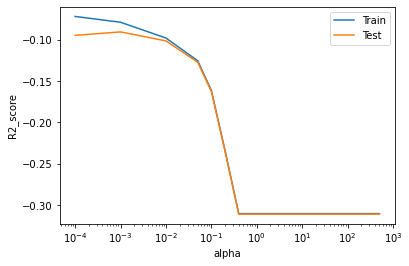

In [241]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)

plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

## Most significant variables

In [242]:
ridge.coef_

array([-0.02392395, -0.00843982,  0.01772211,  0.08228445,  0.04075566,
       -0.00141448, -0.00092443,  0.00768062,  0.00497607,  0.00678449,
        0.03674105,  0.04118971,  0.00205842,  0.06137463,  0.03003599,
        0.00310624,  0.0199195 ,  0.01188586,  0.01055057, -0.01127831,
        0.01674368,  0.00447676, -0.00340009,  0.04215108,  0.00547279,
        0.01249381, -0.00192075,  0.00955785,  0.00770344,  0.01104257,
       -0.01556992, -0.00190504, -0.00176752, -0.00748196, -0.03611179,
       -0.02248542, -0.09620658,  0.01969365,  0.03193104, -0.01992288,
        0.01941112,  0.01848929, -0.03875338,  0.00164078,  0.03055039,
        0.03576812,  0.04081272, -0.00984218,  0.029343  , -0.03099813,
       -0.00799016, -0.00430321,  0.02451858, -0.00582494, -0.01947768,
        0.01748247,  0.04703159, -0.01621165,  0.09033929, -0.07670158,
       -0.02827626, -0.0510939 , -0.0353871 , -0.02207989, -0.00850572,
       -0.0113438 ,  0.0386454 ,  0.0700582 , -0.0212818 ,  0.00

In [243]:
## Top 10 coefficients 
coef = pd.DataFrame(index=X_train.columns)
coef.rows = X_train.columns

In [244]:
coef['Ridge'] = ridge.coef_
coef['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.090339
OverallQual             0.082284
Neighborhood_Somerst    0.072639
Neighborhood_NridgHt    0.070058
GrLivArea               0.061375
Condition1_Norm         0.057215
Exterior1st_BrkFace     0.051665
Neighborhood_ClearCr    0.047032
SaleType_Other          0.045838
BsmtExposure_Gd         0.045726
Name: Ridge, dtype: float64

In [245]:
coef['Lasso'] = lasso.coef_
coef['Lasso'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.113411
GrLivArea               0.111717
OverallQual             0.090816
Neighborhood_NridgHt    0.086269
Neighborhood_Somerst    0.076942
Condition1_Norm         0.059614
Exterior1st_BrkFace     0.055375
BsmtExposure_Gd         0.050069
Neighborhood_ClearCr    0.049770
GarageCars              0.049054
Name: Lasso, dtype: float64